In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-02-17 07:01:20,162: Default instance: ibm-q/open/main


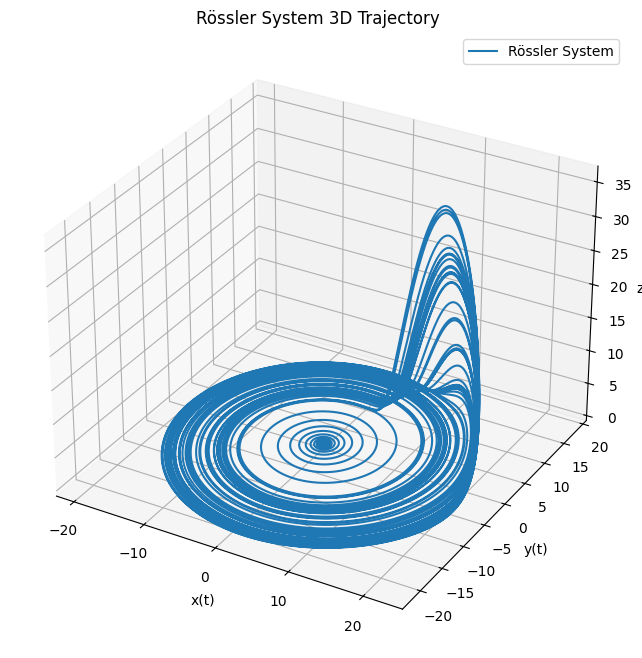

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
a = 0.1
b = 0.1
c = 14
dt = 0.0001
num_steps = 5000000  # Number of time steps

# Initial conditions
x = np.zeros(num_steps)
y = np.zeros(num_steps)
z = np.zeros(num_steps)

x[0] = 0
y[0] = 0
z[0] = 0

# Explicit Euler method
for n in range(num_steps - 1):
    x[n+1] = x[n] - dt * (y[n] + z[n])
    y[n+1] = y[n] + dt * (x[n] + a * y[n])
    z[n+1] = z[n] + dt * (b + z[n] * (x[n] - c))

# Plotting the 3D trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Rössler System')

ax.set_title('Rössler System 3D Trajectory')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
ax.legend()

plt.show()



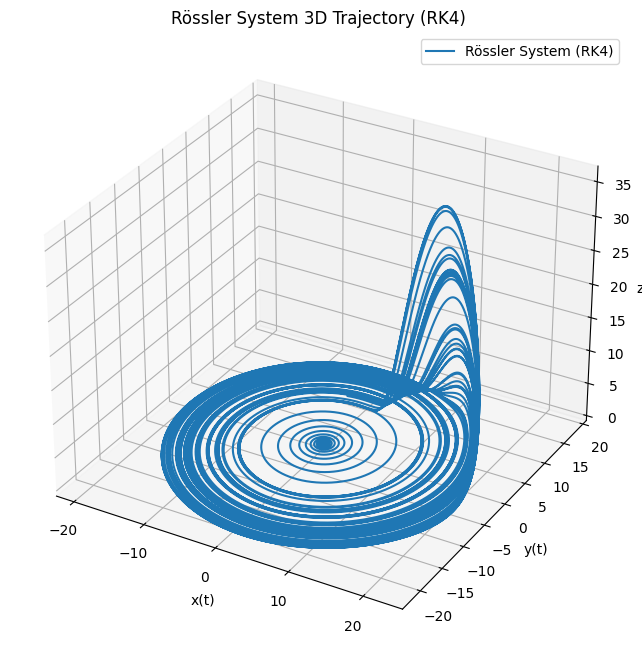

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rössler system parameters
a = 0.1
b = 0.1
c = 14.0

# Time step and number of iterations
dt = 0.0001
num_steps = 5000000

# Initial conditions
x = np.zeros(num_steps)
y = np.zeros(num_steps)
z = np.zeros(num_steps)

x[0] = 0
y[0] = 0
z[0] = 0

# Function to update Rössler variables using RK4 method
def update_rosler(x, y, z, dt):
    dx1 = -y - z
    dy1 = x + a * y
    dz1 = b + z * (x - c)

    dx2 = -(y + 0.5 * dt * dy1) - (z + 0.5 * dt * dz1)
    dy2 = x + a * (y + 0.5 * dt * dy1)
    dz2 = b + (z + 0.5 * dt * dz1) * (x + 0.5 * dt * dx1 - c)

    dx3 = -(y + 0.5 * dt * dy2) - (z + 0.5 * dt * dz2)
    dy3 = x + a * (y + 0.5 * dt * dy2)
    dz3 = b + (z + 0.5 * dt * dz2) * (x + 0.5 * dt * dx2 - c)

    dx4 = -(y + dt * dy3) - (z + dt * dz3)
    dy4 = x + a * (y + dt * dy3)
    dz4 = b + (z + dt * dz3) * (x + dt * dx3 - c)

    x_new = x + (dt / 6) * (dx1 + 2 * dx2 + 2 * dx3 + dx4)
    y_new = y + (dt / 6) * (dy1 + 2 * dy2 + 2 * dy3 + dy4)
    z_new = z + (dt / 6) * (dz1 + 2 * dz2 + 2 * dz3 + dz4)

    return x_new, y_new, z_new

# Iterate using RK4 method
for n in range(num_steps - 1):
    x[n+1], y[n+1], z[n+1] = update_rosler(x[n], y[n], z[n], dt)

# Plotting the 3D trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Rössler System (RK4)')

ax.set_title('Rössler System 3D Trajectory (RK4)')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
ax.legend()

plt.show()



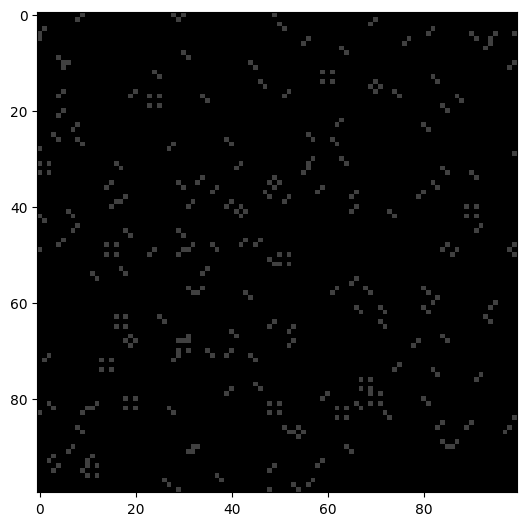

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the size of the grid
n, m = 100, 100
timesteps = 100

# Initialize the grid
grid = np.random.randint(5, size=(n, m))

# Define the transition rule
def transition_rule(grid, i, j):
    # Get the state of the neighboring cells
    neighbors = [grid[(i-1)%n][j], grid[(i+1)%n][j], grid[i][(j-1)%m], grid[i][(j+1)%m]]
    # for example, if a cell has 2 neighboring cells that are in state 1:
    if neighbors.count(1) == 2:
        return 1
    else:
        return 0

# Create a figure and axes
fig, ax = plt.subplots(frameon=False)

# Plot the initial state of the grid
im = ax.imshow(grid, cmap='gray')

# Define the update function
def update(frame):
    global grid
    temp_grid = grid.copy()
    for i in range(n):
        for j in range(m):
            grid[i][j] = transition_rule(temp_grid, i, j)
    im.set_data(grid)


# Remove whitespace around the animation
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Create the animation
ani = FuncAnimation(fig, update, frames=range(timesteps), repeat=False)

# Save the animation as a video
ani.save("von_neumann_automaton.mp4", writer='ffmpeg')

In [7]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 2.7 MB/s eta 0:00:00:00:0100:01


In [8]:
import numpy as np
from multiprocessing import Pool
import cv2

# Define the seed value for the Julia set (-0.4, 0.6)
seed_value = complex(-0.4, 0.6)
max_iterations = 256

# Define the escape time function for the Julia set
def escape_time(c):
    z = c
    for i in range(max_iterations):
        z = z*z + seed_value
        if abs(z) > 2:
            return i, int(i*255/256), int(i*255/256), int(i*255/256)
    return max_iterations, 0, 0, 0

# Define the function to generate the Julia set
def generate_julia(coord):
    x,y = coord
    julia_set = np.zeros((800, 800, 4), dtype=np.uint8)
    for x, y in product(range(x, x+200), range(y, y+200)):
        c = complex(x/200, y/200)
        julia_set[x+400, y+400] = escape_time(c)
    return julia_set

# Create a pool of worker processes
with Pool() as p:
    # Divide the x and y ranges into chunks and generate the Julia set in parallel
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y) for x in range(-400, 400, 200) for y in range(-400, 400, 200)), chunksize=1))

#save the image using OpenCV
cv2.imwrite("julia_set.png", julia_set)

plt.show()

Traceback (most recent call last):
  Cell In[8], line 30
    julia_set = np.vstack(p.imap_unordered(generate_julia, ((x, y) for x in range(-400, 400, 200) for y in range(-400, 400, 200)), chunksize=1))
  File /opt/conda/lib/python3.10/site-packages/numpy/core/shape_base.py:216 in _vhstack_dispatcher
    return _arrays_for_stack_dispatcher(tup)
  File /opt/conda/lib/python3.10/site-packages/numpy/core/shape_base.py:209 in _arrays_for_stack_dispatcher
    raise TypeError('arrays to stack must be passed as a "sequence" type '
TypeError: arrays to stack must be passed as a "sequence" type such as list or tuple.

Use %tb to get the full traceback.
